# 지역별 발전소 현황 데이터 추출 및 분류

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 57 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12

In [2]:
df = pd.read_csv('제주특별자치도_신재생에너지발전시설현황_20221116.csv', encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   허가일자      1582 non-null   object 
 1   상호        1582 non-null   object 
 2   설비용량(KW)  1582 non-null   float64
 3   설치장소      1582 non-null   object 
 4   원동력종류     1582 non-null   object 
 5   사업개시일     1582 non-null   object 
 6   데이터기준일자   1582 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.6+ KB


In [3]:
df.head()

,허가일자,상호,설비용량(KW),설치장소,원동력종류,사업개시일,데이터기준일자
0,2019-05-22,북촌서모풍력발전소,3000.0,제주특별자치도 제주시 조천읍,풍력,2020-07-31,2022-11-16
1,2016-12-12,동복리마을풍력발전소,2000.0,제주특별자치도 제주시 구좌읍,풍력,2017-12-01,2022-11-16
2,2016-10-17,수망풍력발전소,25200.0,제주특별자치도 서귀포시 남원읍,풍력,2020-06-29,2022-11-16
3,2014-06-13,동복북촌풍력발전단지,30000.0,제주특별자치도 제주시 구좌읍,풍력,2015-08-01,2022-11-16
4,2014-05-02,상명풍력발전소,21000.0,제주특별자치도 제주시 한림읍,풍력,2016-08-22,2022-11-16


In [4]:
# 원동력의 종류 확인
df['원동력종류'].unique()

array(['풍력', '태양광', '수력', '바이오가스', '기타'], dtype=object)

In [5]:
# '바이오가스'와 '기타'를 포함한 row를 제거한다
df = df[~df['원동력종류'].isin(['바이오가스', '기타'])]
df['원동력종류'].unique()

array(['풍력', '태양광', '수력'], dtype=object)

In [6]:
# 설치장소와 원동력종류에 따른 설비용량 Dataframe 생성.
# 같은 장소와 같은 원동력의 설비용량은 합친다.
df_volume = df[['설치장소', '원동력종류', '설비용량(KW)']]
df_volume = df_volume.groupby(['설치장소', '원동력종류']).sum().reset_index()
df_volume

,설치장소,원동력종류,설비용량(KW)
0,제주특별자치도 서귀포시 강정동,태양광,2459.94
1,제주특별자치도 서귀포시 남원읍,태양광,62606.33
2,제주특별자치도 서귀포시 남원읍,풍력,25200.00
3,제주특별자치도 서귀포시 대정읍,수력,50.00
4,제주특별자치도 서귀포시 대정읍,태양광,47267.27
...,...,...,...
59,제주특별자치도 제주시 한림읍,풍력,23000.00
60,제주특별자치도 제주시 해안동,수력,287.00
61,제주특별자치도 제주시 해안동,태양광,2188.07
62,제주특별자치도 제주시 화북이동,태양광,316.80


In [7]:
# 설치장소의 시, 동을 별개의 column으로 추출
df_volume['시'] = df_volume['설치장소'].str.split(' ', expand=True)[1]
df_volume['동'] = df_volume['설치장소'].str.split(' ', expand=True)[2]
df_volume

,설치장소,원동력종류,설비용량(KW),시,동
0,제주특별자치도 서귀포시 강정동,태양광,2459.94,서귀포시,강정동
1,제주특별자치도 서귀포시 남원읍,태양광,62606.33,서귀포시,남원읍
2,제주특별자치도 서귀포시 남원읍,풍력,25200.00,서귀포시,남원읍
3,제주특별자치도 서귀포시 대정읍,수력,50.00,서귀포시,대정읍
4,제주특별자치도 서귀포시 대정읍,태양광,47267.27,서귀포시,대정읍
...,...,...,...,...,...
59,제주특별자치도 제주시 한림읍,풍력,23000.00,제주시,한림읍
60,제주특별자치도 제주시 해안동,수력,287.00,제주시,해안동
61,제주특별자치도 제주시 해안동,태양광,2188.07,제주시,해안동
62,제주특별자치도 제주시 화북이동,태양광,316.80,제주시,화북이동


In [8]:
# 원동력종류 column 이름을 elec_type으로 바꾸기
df_volume = df_volume.rename(columns={'원동력종류': 'elec_type', '설비용량(KW)':'kw'})
df_volume.head()

,설치장소,elec_type,kw,시,동
0,제주특별자치도 서귀포시 강정동,태양광,2459.94,서귀포시,강정동
1,제주특별자치도 서귀포시 남원읍,태양광,62606.33,서귀포시,남원읍
2,제주특별자치도 서귀포시 남원읍,풍력,25200.00,서귀포시,남원읍
3,제주특별자치도 서귀포시 대정읍,수력,50.00,서귀포시,대정읍
4,제주특별자치도 서귀포시 대정읍,태양광,47267.27,서귀포시,대정읍


# 발전 시설 존재하는 행정동 시각화
### 활용 라이브러리
* geopandas
* folium

In [9]:
# pip install geopandas pandas
import geopandas as gpd
import pandas as pd
import folium

In [10]:
# geojson 형태로 변형된 emd.json 파일 활용
df_bdong = gpd.read_file('emd.json')
df_gu = gpd.read_file('sig.json')

In [11]:
result_df = pd.merge(df_gu, df_bdong, left_on=df_gu['SIG_CD'], right_on=df_bdong['EMD_CD'].str[:5], how='left')

In [12]:
gdf_jeju = result_df[result_df['SIG_KOR_NM'].isin(['제주시', '서귀포시'])].reset_index(drop=True)

In [13]:
# 발전소가 존재하는 법정동의 위치데이터만 추출
gdf_jeju_elec = gdf_jeju[gdf_jeju['EMD_KOR_NM'].isin(df_volume['동'])]
gdf_jeju_elec.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 54 entries, 1 to 73
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   key_0       54 non-null     object  
 1   SIG_CD      54 non-null     object  
 2   SIG_ENG_NM  54 non-null     object  
 3   SIG_KOR_NM  54 non-null     object  
 4   geometry_x  54 non-null     geometry
 5   EMD_CD      54 non-null     object  
 6   EMD_ENG_NM  54 non-null     object  
 7   EMD_KOR_NM  54 non-null     object  
 8   geometry_y  54 non-null     geometry
dtypes: geometry(2), object(7)
memory usage: 4.2+ KB


In [14]:
# df_volume의 설비용량과 원동력 종류를 지역정보와 결합 후, '시' '동' column 삭제
gdf_jeju_elec = pd.merge(gdf_jeju_elec, df_volume, left_on='EMD_KOR_NM', right_on='동', how='left')
gdf_jeju_elec.head()

,key_0,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry_x,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry_y,설치장소,elec_type,kw,시,동
0,50110,50110,Jeju-si,제주시,"MULTIPOLYGON (((874410.95328 1480515.38189, 87...",50110102,Ildo 2(i)-dong,일도이동,"POLYGON ((126.55475 33.50461, 126.5547 33.5046...",제주특별자치도 제주시 일도이동,태양광,107.40,제주시,일도이동
1,50110,50110,Jeju-si,제주시,"MULTIPOLYGON (((874410.95328 1480515.38189, 87...",50110103,Ido 1(il)-dong,이도일동,"POLYGON ((126.52931 33.50634, 126.52894 33.506...",제주특별자치도 제주시 이도일동,태양광,19.88,제주시,이도일동
2,50110,50110,Jeju-si,제주시,"MULTIPOLYGON (((874410.95328 1480515.38189, 87...",50110106,Samdo 2(i)-dong,삼도이동,"POLYGON ((126.52415 33.51601, 126.52418 33.516...",제주특별자치도 제주시 삼도이동,태양광,94.24,제주시,삼도이동
3,50110,50110,Jeju-si,제주시,"MULTIPOLYGON (((874410.95328 1480515.38189, 87...",50110109,Yongdam 2(i)-dong,용담이동,"POLYGON ((126.51047 33.51528, 126.51046 33.515...",제주특별자치도 제주시 용담이동,태양광,320.50,제주시,용담이동
4,50110,50110,Jeju-si,제주시,"MULTIPOLYGON (((874410.95328 1480515.38189, 87...",50110112,Hwabuk 2(i)-dong,화북이동,"POLYGON ((126.57778 33.51428, 126.57713 33.514...",제주특별자치도 제주시 화북이동,태양광,316.80,제주시,화북이동


# 발전소 시각화

In [23]:
m = folium.Map(location=(33.374075, 126.538336), tiles="OpenStreetMap", zoom_start=10)

# FeatureGroup 사전 생성
layer_dict = {}


# 각 경계선을 지도에 추가
for idx, row in gdf_jeju_elec.iterrows():

    elec_type = row['elec_type']
    si_name = row['SIG_KOR_NM']
    dong_name = row['EMD_KOR_NM']
    polygon_wkt = row['geometry_y']
    volume = row['kw']

    if elec_type in layer_dict:
        layer = layer_dict[elec_type]
    else:
        # 해당 구이름에 대한 FeatureGroup가 없으면 새로 생성
        layer = folium.FeatureGroup(name=elec_type,show=False)
        layer_dict[elec_type] = layer
        layer.add_to(m)


    t1 = folium.GeoJson(polygon_wkt,
                       style_function=lambda feature, color='red': {
                           'fillColor': 'red', #채우기 색상
                           'fillOpacity': 0.3, #채우기 투명도
                           'color': 'red', # 테두리 색상
                           'weight': 1, #테두리 두께
                           'opacity': 1  # 테두리 투명도
                       },
                       tooltip=f'시: {si_name} 법정동: {dong_name} 원동력:{elec_type} 설비용량: {volume}')

    t1.add_to(layer)

# folium.LayerControl 추가한 뒤, 지도 표시
folium.LayerControl(collapsed=False).add_to(m)
folium.LatLngPopup().add_to(m)
display(m)

Output hidden; open in https://colab.research.google.com to view.

# 태양광 발전
* 제주도 전반적으로 고루 퍼짐

# 풍력 발전
* 제주시: 한경면, 한림읍, 조천읍, 구좌읍
* 서귀포시 : 남원읍, 표선면, 성산읍

# 방식 별 발전용량 비교
## 1. 제주도 전체

In [18]:
# 제주도 전체, elec_type별 kw 용량을 나타내는 Dataframe 생성
df_total_type_kw = df_volume.groupby('elec_type').sum().reset_index()
df_total_type_kw = df_total_type_kw[['elec_type', 'kw']]
df_total_type_kw

,elec_type,kw
0,수력,816.40
1,태양광,509086.72
2,풍력,285440.00


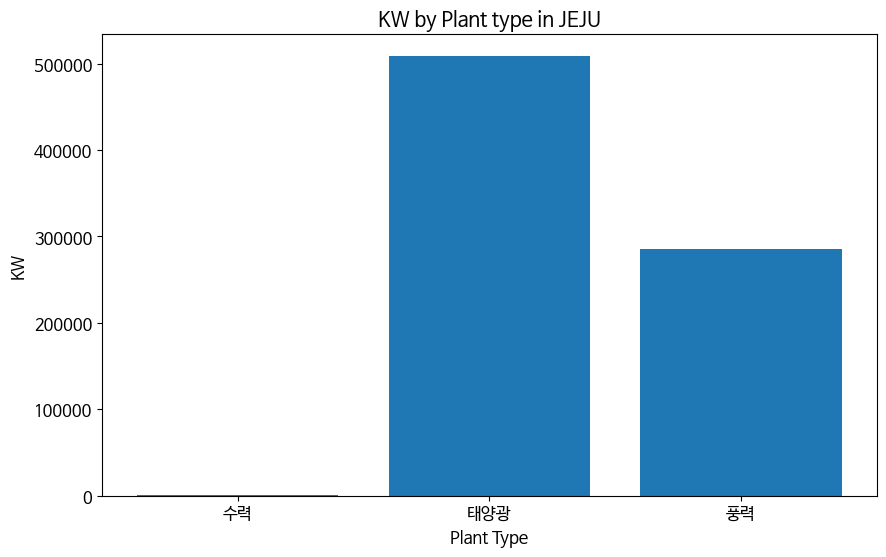

In [21]:
# 시각화
import matplotlib.font_manager as fm

plt.figure(figsize=(10, 6))
plt.bar(df_total_type_kw['elec_type'], df_total_type_kw['kw'])
plt.xlabel('Plant Type')
plt.ylabel('KW')
plt.title('KW by Plant type in JEJU')
plt.show()

## 2. 지역별
#### 풍력발전에 기초하여 분류.
* 한경면, 조천읍, 구좌읍, 그외 제주시
* 남원읍, 표선면, 성산읍, 그외 서귀포시


In [32]:
# 설치 장소 Drop
df_dong_type_kw = df_volume.drop('설치장소', axis=1)

# 시, 동, elec_type에 대해 kw 합치기
df_dong_type_kw = df_dong_type_kw.groupby(['시', '동', 'elec_type']).sum().reset_index()
df_dong_type_kw

,시,동,elec_type,kw
0,서귀포시,강정동,태양광,2459.94
1,서귀포시,남원읍,태양광,62606.33
2,서귀포시,남원읍,풍력,25200.00
3,서귀포시,대정읍,수력,50.00
4,서귀포시,대정읍,태양광,47267.27
...,...,...,...,...
59,제주시,한림읍,풍력,23000.00
60,제주시,해안동,수력,287.00
61,제주시,해안동,태양광,2188.07
62,제주시,화북이동,태양광,316.80


In [43]:
# '제주시' 중 '한경면' '한림읍 '조천읍' '구좌읍'이 아닌 동 column의 데이터를 합쳐 '그외제주시'로 동이름 변경
df_jeju_kw = df_dong_type_kw[df_dong_type_kw['시'] == '제주시']
df_jeju_kw = df_jeju_kw[~df_jeju_kw['동'].isin(['한경면', '한림읍', '조천읍', '구좌읍'])]
df_jeju_kw['동'] = '그외제주시'

# 시, 동, elec_type에 기반하여 kw를 합침
df_jeju_kw = df_jeju_kw.groupby(['시','동', 'elec_type']).sum().reset_index()
df_jeju_kw

# 한경면, 한림읍, 조천읍, 구좌읍 데이터 프레임 생성하여 결합
df_jeju_kw_wind = df_dong_type_kw[df_dong_type_kw['시'] == '제주시']
df_jeju_kw_wind = df_jeju_kw_wind[df_jeju_kw_wind['동'].isin(['한경면', '한림읍', '조천읍', '구좌읍'])]
df_jeju_kw_wind

# df_jeju_kw와 df_jeju_kw_wind를 합치기
df_jeju_kw = pd.concat([df_jeju_kw, df_jeju_kw_wind])
df_jeju_kw

,시,동,elec_type,kw
0,제주시,그외제주시,수력,287.00
1,제주시,그외제주시,태양광,58028.53
28,제주시,구좌읍,수력,60.00
29,제주시,구좌읍,태양광,50551.08
30,제주시,구좌읍,풍력,95540.00
53,제주시,조천읍,태양광,27580.46
54,제주시,조천읍,풍력,3000.00
55,제주시,한경면,수력,400.00
56,제주시,한경면,태양광,35297.40
57,제주시,한경면,풍력,52700.00


In [47]:
# '서귀포시' 중 '남원읍', '표선면', '성산읍'이 아닌 동 column의 데이터를 합쳐 '그외서귀포'로 동이름 변경
df_seo_kw = df_dong_type_kw[df_dong_type_kw['시'] == '서귀포시']
df_seo_kw = df_seo_kw[~df_seo_kw['동'].isin(['남원읍', '표선면', '성산읍'])]
df_seo_kw['동'] = '그외서귀포'

# 시, 동, elec_type에 기반하여 kw를 합침
df_seo_kw = df_seo_kw.groupby(['시','동', 'elec_type']).sum().reset_index()
#df_seo_kw

# '남원읍', '표선면', '성산읍' 데이터 프레임 생성하여 결합
df_seo_kw_wind = df_dong_type_kw[df_dong_type_kw['시'] == '서귀포시']
df_seo_kw_wind = df_seo_kw_wind[df_seo_kw_wind['동'].isin(['남원읍', '표선면', '성산읍'])]
#df_seo_kw_wind

# df_jeju_kw와 df_jeju_kw_wind를 합치기
df_seo_kw = pd.concat([df_seo_kw, df_seo_kw_wind])
df_seo_kw

,시,동,elec_type,kw
0,서귀포시,그외서귀포,수력,69.40
1,서귀포시,그외서귀포,태양광,93791.76
1,서귀포시,남원읍,태양광,62606.33
2,서귀포시,남원읍,풍력,25200.00
15,서귀포시,성산읍,태양광,50066.08
16,서귀포시,성산읍,풍력,41000.00
21,서귀포시,표선면,태양광,80503.17
22,서귀포시,표선면,풍력,45000.00


In [50]:
df_final_kw = pd.concat([df_jeju_kw, df_seo_kw])
df_final_kw

# 시-동 합치고 시, 동 column 삭제
df_final_kw['시 동'] = df_final_kw['시'] + '-' + df_final_kw['동']
df_final_kw = df_final_kw.drop(['시', '동'], axis=1)
df_final_kw

,elec_type,kw,시 동
0,수력,287.00,제주시-그외제주시
1,태양광,58028.53,제주시-그외제주시
28,수력,60.00,제주시-구좌읍
29,태양광,50551.08,제주시-구좌읍
30,풍력,95540.00,제주시-구좌읍
53,태양광,27580.46,제주시-조천읍
54,풍력,3000.00,제주시-조천읍
55,수력,400.00,제주시-한경면
56,태양광,35297.40,제주시-한경면
57,풍력,52700.00,제주시-한경면


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

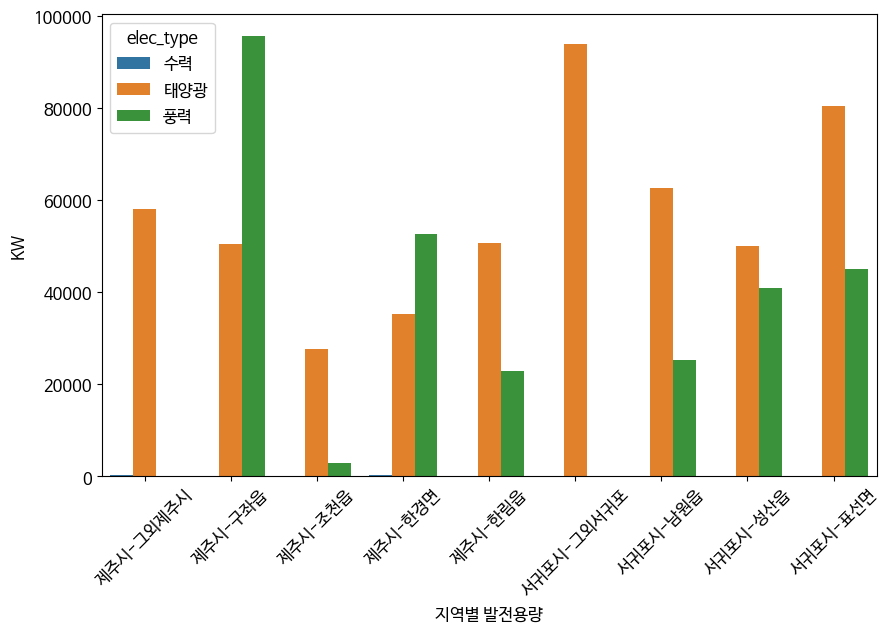

In [55]:
# bar로 df_final_kw 시각화. X축은 '시 동'과 'elec_type'으로 묶고, Y축은 'kw'
plt.figure(figsize=(10, 6))

sns.barplot(data=df_final_kw, x='시 동', y='kw', hue='elec_type')
plt.xticks(rotation=45)
plt.xlabel('지역별 발전용량')
plt.ylabel('KW')
plt